# Applied Machine Learning - Predict Diabetes## Predict whether the patient has diabetes or not.


**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import tensorflow as tf

**1. Import the dataset (https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)**

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [2]:
header_list = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv('diabetes.csv', names=header_list)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Checking columns**

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Check for missing/null values in a dataset**

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Some patients have missing data(Attributes with 0) for some of the features. Hence, we need to perform DATA CLEANING**

**Option 1:**Eliminate all those patients with null/zero values, but in this way we would eliminate a lot of important data.

**Option 2:**Calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null.

Let's proceed with Option 2.

In [5]:
# Calculate the median value for BMI and Substitute it in the BMI column of the dataset where values are 0
median_bmi = df['BMI'].median()
df['BMI'] = df['BMI'].replace(to_replace=0, value=median_bmi)

In [6]:
# Calculate the median value for BloodPressure and Substitute it in the BloodPressure column of the dataset where values are 0
median_bloodp = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(to_replace=0, value=median_bloodp)


In [7]:
# Calculate the median value for Glucose and Substitute it in the Glucose column of the dataset where values are 0
median_glucose = df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(to_replace=0, value=median_glucose)


In [8]:
# Calculate the median value for SkinThickness and Substitute it in the SkinThickness column of the dataset where values are 0
median_skinthick = df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(to_replace=0, value=median_skinthick)

In [9]:
# Calculate the median value for Insulin and Substitute it in the Insulin column of the dataset where values are 0
median_insulin = df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(to_replace=0, value=median_insulin)

In [10]:
df.head(100)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228.0,33.9,0.255,40,0
96,2,92,62,28,30.5,31.6,0.130,24,0
97,1,71,48,18,76.0,20.4,0.323,22,0
98,6,93,50,30,64.0,28.7,0.356,23,0


**2.Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y.**

In [11]:
X = df.iloc[:, :-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y = df.iloc[:, -1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

**3.Remove columns that don’t help the problem statement.**

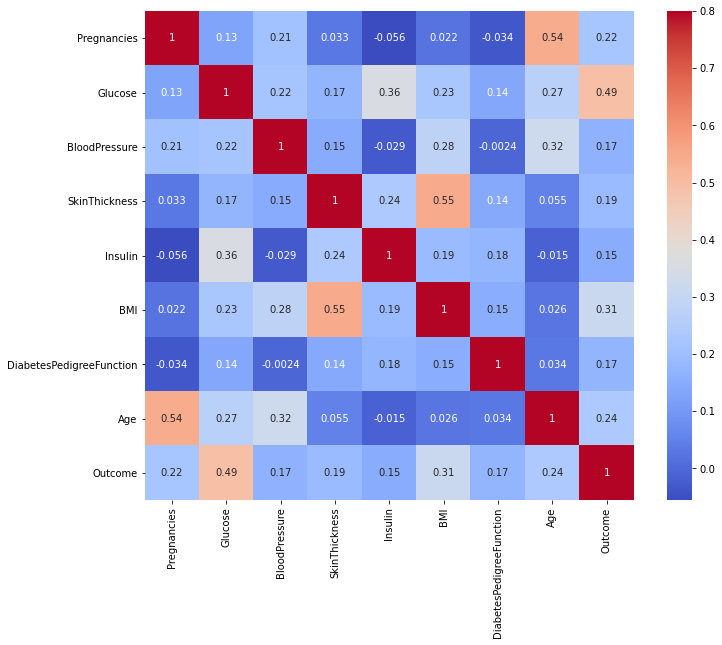

In [13]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True, annot= True);

All the columns ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age') are essential to Predict the 'Outcome'. Hence no column is removed.

**4.Do Feature Scaling on Independent variables and 5. Split the data into train and test dataset**

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
from sklearn.model_selection import train_test_split
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X_feature = df[features]
y_target = df['Outcome']
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.2, random_state = 42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[-0.52639686, -1.25688146, -0.01899526, ..., -0.05024677,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32605067,  0.8081742 , ..., -0.59858988,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57153617, -2.16963585, ..., -0.52643947,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69173419,  1.13904198, ...,  1.91224437,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.63802409, -0.01899526, ...,  1.45048175,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10612077,  1.96621144, ..., -1.42110454,
        -0.61552223, -1.03594038]])

In [19]:
X_test

array([[ 0.68185612, -0.79146606, -1.1770325 , ...,  0.23835487,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.32605067,  0.22915558, ...,  0.48366626,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.45902649, -0.68073083, ..., -0.22340775,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.89119794, -0.01899526, ...,  0.64239716,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.80424387, -0.18442915, ..., -0.62745004,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.58932103, -0.18442915, ...,  0.42594593,
         0.70068816,  0.53008521]])

In [20]:
print(" Shape of x_train = ", X_train.shape)
print(" Shape of x_test = ", X_test.shape)
print(" Shape of y_train = ", y_train.shape)
print(" Shape of y_test = ", y_test.shape)

 Shape of x_train =  (614, 8)
 Shape of x_test =  (154, 8)
 Shape of y_train =  (614,)
 Shape of y_test =  (154,)


**6.Use Keras to make the neural network model and train the dataset on the same.**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
#Creating neural network model using Keras
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# Compiling neural network model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# training
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.7309 - accuracy: 0.5234
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.7449
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7561
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7661
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7528
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7463
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7643
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7480: 0s - loss: 0.5060 - accuracy: 0.
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7623
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0

62/62 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8316
Epoch 83/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8123
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.3798 - accuracy: 0.8093
Epoch 85/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8092
Epoch 86/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8166
Epoch 87/150
62/62 [==============================] - 0s 1ms/step - loss: 0.3838 - accuracy: 0.8283
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8081
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.7944
Epoch 90/150
62/62 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.7994
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8225
Epoch 92/150


**7.Compute the accuracy and confusion matrix.**

In [28]:
#Prediction
y_pred = model.predict(X_test)
y_pred=(y_pred>0.5)

In [29]:
#Model Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc*100)

Model Accuracy: 68.83116883116884


In [30]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[73, 26],
       [22, 33]], dtype=int64)